In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from time import sleep
import socket,time,requests
from bs4 import BeautifulSoup
import tkinter as tk
from datetime import date




url="https://uzmanpara.milliyet.com.tr/canli-borsa/bist-TUM-hisseleri/"
r=requests.get(url)
soup=BeautifulSoup(r.content,"html.parser")

bs=BeautifulSoup(r.content, "lxml")
data=soup.find("div",{"class":"box box10 last"})
data


<div class="box box10 last" id="acik_koyu_yeri3">
<table border="0" cellpadding="0" cellspacing="0" class="table3">
<tbody>
<tr><th class="left">Menkul</th>
<th class="currency"></th>
<th class="center">Fiyat</th>
<th class="center td2">%</th>
<th class="center td2">Zaman</th>
</tr>
<tr class="zebra" id="h_tr_id_PKART">
<td class="currency"><a href="/borsa/hisse-senetleri/plastikkart-pkart/" target="_blank"><b id="h_b_ad_id_PKART">PKART</b></a></td>
<td class="currency-up" id="h_td_yon_id_PKART"> </td>
<td class="center" id="h_td_fiyat_id_PKART">22,76</td>
<td class="center" id="h_td_yuzde_id_PKART">1,97</td>
<td class="center" id="h_td_zaman_id_PKART">18:09:39</td>
</tr>
<tr class="zebra" id="h_tr_id_PKENT">
<td class="currency"><a href="/borsa/hisse-senetleri/petrokent-turizm-pkent/" target="_blank"><b id="h_b_ad_id_PKENT">PKENT</b></a></td>
<td class="currency-up" id="h_td_yon_id_PKENT"> </td>
<td class="center" id="h_td_fiyat_id_PKENT">114,60</td>
<td class="center" id="h_td_yuzde_

In [434]:
data=soup.find("tr",{"id":"h_tr_id_SASA"})


In [435]:
data=soup.find("td",{"id":"h_td_fiyat_id_SASA"})
text=data.text

In [436]:
text=text.replace(',', '.')
text=float(text)
text

55.5

In [3]:
sasa=pd.read_csv("/Users/Bora/Documents/GitHub/SASA-Hisse-Analizi/SASA.csv")
sasa.index=pd.to_datetime(sasa["Date"])


In [4]:
del sasa["Date"]

In [5]:
sasa=pd.DataFrame(sasa)

In [440]:
sasa

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,0.938,0.888,0.957,0.888,277.84M,5.99%
2018-01-03,0.957,0.950,0.986,0.946,171.78M,2.03%
2018-01-04,0.948,0.966,0.989,0.942,178.09M,-0.94%
2018-01-05,0.962,0.958,0.978,0.943,161.62M,1.48%
2018-01-08,0.983,0.969,0.999,0.966,200.51M,2.18%
...,...,...,...,...,...,...
2023-06-12,62.600,66.000,66.450,62.600,47.60M,-4.50%
2023-06-13,56.350,57.600,61.400,56.350,117.63M,-9.98%
2023-06-14,54.950,56.650,57.850,53.400,91.00M,-2.48%


In [6]:
close=pd.DataFrame(sasa["Price"])

close


,Price
Date,
2018-01-02,0.938
2018-01-03,0.957
2018-01-04,0.948
2018-01-05,0.962
2018-01-08,0.983
...,...
2023-06-12,62.600
2023-06-13,56.350
2023-06-14,54.950


In [442]:
dict={'Date':date.today(),'Price':text}
df=pd.DataFrame.from_dict(dict,orient="index")
df=df.T
df.reset_index()
df

,Date,Price
0,2023-06-17,55.5


In [443]:
df.set_index=df["Date"]
df

,Date,Price
0,2023-06-17,55.5


In [444]:
df.index=df["Date"]

In [445]:
del df["Date"]

In [446]:
df.index=pd.to_datetime(df.index)
df

,Price
Date,
2023-06-17,55.5


In [374]:
close=pd.concat([close,df])
close

,Price
Date,
2018-01-02,0.938
2018-01-03,0.957
2018-01-04,0.948
2018-01-05,0.962
2018-01-08,0.983
...,...
2023-06-13,56.35
2023-06-14,54.95
2023-06-15,56.3


In [7]:
rolling_app5=close.rolling(window=5).mean()
rolling_app14=close.rolling(window=15).mean()
rolling_app21=close.rolling(window=20).mean()



In [8]:
MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns=["Close","short","mid","long"]


In [9]:
MAs.dropna(axis=0,inplace=True)
MAs

,Close,short,mid,long
Date,,,,
2018-01-29,0.942,0.9426,0.951533,0.95305
2018-01-30,0.923,0.9394,0.947933,0.95230
2018-01-31,0.903,0.9288,0.945133,0.94960
2018-02-01,0.889,0.9182,0.939267,0.94665
2018-02-02,0.870,0.9054,0.933000,0.94205
...,...,...,...,...
2023-06-12,62.600,65.3400,57.621333,54.12470
2023-06-13,56.350,63.3400,58.044667,54.89765
2023-06-14,54.950,61.0700,58.331333,55.47560


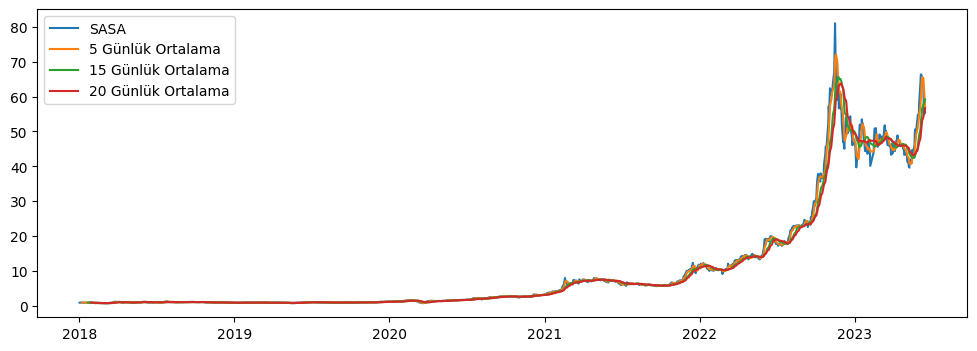

In [10]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(close.index,close,label='SASA')
ax.plot(rolling_app5.index,rolling_app5,label='5 Günlük Ortalama')
ax.plot(rolling_app14.index,rolling_app14,label='15 Günlük Ortalama')
ax.plot(rolling_app21.index,rolling_app21,label='20 Günlük Ortalama')
ax.legend(loc='upper left')


In [11]:
def buy_sell(data,perc=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))

    for i in range(0,len(data)):
        if (data["short"][i]>data["mid"][i]+sm) & (data["short"][i]>data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i]<data["mid"][i]-sm)&(data["short"][i]<data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    operations=operations[neg:-pos]
    PL=np.sum(operations)

    return (buy_signal,sell_signal,PL)


In [12]:
m=buy_sell(MAs)
MAs["Al"]=m[0]
MAs["Sat"]=m[1]

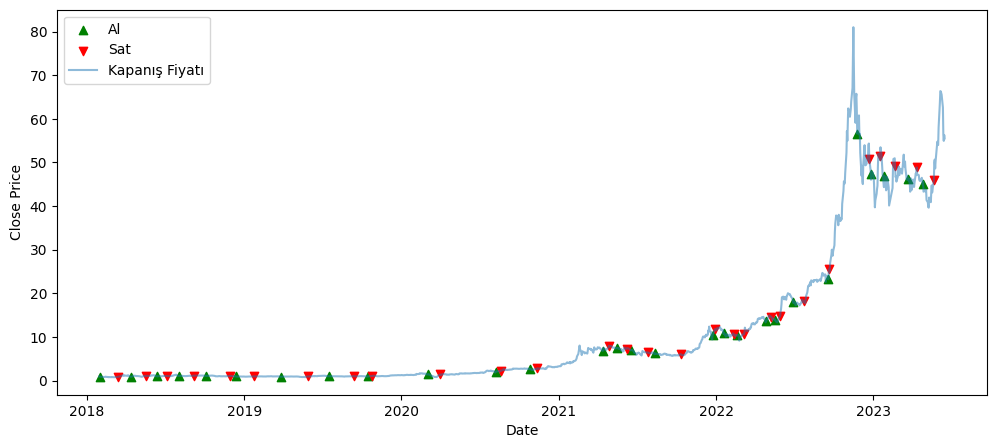

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(MAs.index,MAs["Al"],color="green",label='Al',marker='^',alpha=1)
plt.scatter(MAs.index,MAs["Sat"],color="red",label='Sat',marker='v',alpha=1)
plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.show()

In [14]:
al=MAs["Al"]
al=al.dropna(axis=0)
al

Date
2018-02-01     0.889
2018-04-12     0.892
2018-06-13     0.955
2018-08-03     1.088
2018-10-04     1.052
2018-12-13     0.955
2019-03-27     0.867
2019-07-17     1.015
2019-10-15     0.949
2020-03-02     1.421
2020-08-07     2.009
2020-10-26     2.603
2021-04-13     6.818
2021-05-17     7.535
2021-06-17     6.943
2021-08-12     6.239
2021-12-24    10.348
2022-01-19    10.913
2022-02-18    10.374
2022-04-28    13.685
2022-05-18    13.930
2022-06-29    18.000
2022-09-19    23.217
2022-11-25    56.609
2022-12-28    47.348
2023-01-27    46.957
2023-03-22    46.217
2023-04-26    44.957
Name: Al, dtype: float64

In [383]:
del al["2023-06-17"]

In [15]:
sat=MAs["Sat"]
sat=sat.dropna(axis=0)
sat


Date
2018-03-14     0.889
2018-05-18     1.073
2018-07-06     1.058
2018-09-07     1.119
2018-11-28     1.053
2019-01-23     0.963
2019-05-29     0.940
2019-09-12     0.999
2019-10-25     1.060
2020-03-31     1.413
2020-08-20     2.272
2020-11-11     2.795
2021-04-27     7.974
2021-06-07     7.343
2021-07-26     6.452
2021-10-11     6.043
2021-12-30    11.837
2022-02-11    10.652
2022-03-07    10.643
2022-05-09    14.661
2022-05-30    14.861
2022-07-25    18.252
2022-09-20    25.478
2022-12-23    50.783
2023-01-16    51.565
2023-02-21    49.087
2023-04-12    48.870
2023-05-22    46.044
Name: Sat, dtype: float64

In [464]:
del sat["2022-03-09"]

In [49]:
sat_val=sat.values
al_val=al.values


In [50]:
sat_val1=sat_val[0:28]

In [51]:
sat_val1

array([ 0.889,  1.073,  1.058,  1.119,  1.053,  0.963,  0.94 ,  0.999,
        1.06 ,  1.413,  2.272,  2.795,  7.974,  7.343,  6.452,  6.043,
       11.837, 10.652, 10.643, 14.661, 14.861, 18.252, 25.478, 50.783,
       51.565, 49.087, 48.87 , 46.044])

In [52]:
al_val1=al_val[0:28]
al_val1

array([ 0.889,  0.892,  0.955,  1.088,  1.052,  0.955,  0.867,  1.015,
        0.949,  1.421,  2.009,  2.603,  6.818,  7.535,  6.943,  6.239,
       10.348, 10.913, 10.374, 13.685, 13.93 , 18.   , 23.217, 56.609,
       47.348, 46.957, 46.217, 44.957])

In [54]:
res=[]

for i in range(28):
    res.append((sat_val1[i]/al_val1[i]))

In [55]:
df=pd.DataFrame()
df["Kar"]=res
df

,Kar
0,1.000000
1,1.202915
2,1.107853
3,1.028493
4,1.000951
5,1.008377
6,1.084198
7,0.984236
8,1.116965
9,0.994370


In [56]:
res0=[100]
for i in range(28):
    res0.append(res0[i]*df["Kar"].loc[i])


In [57]:
df["Eldeki Para"]=res0[1:]
df

,Kar,Eldeki Para
0,1.000000,100.000000
1,1.202915,120.291480
2,1.107853,133.265325
3,1.028493,137.062407
4,1.000951,137.192695
5,1.008377,138.341953
6,1.084198,149.990122
7,0.984236,147.625746
8,1.116965,164.892824
9,0.994370,163.964504


In [58]:
karlilik=df["Eldeki Para"].iloc[-1]/df["Eldeki Para"].iloc[0]
karlilik=(karlilik-1)*100
print("Karlılık oranı %",karlilik)

Karlılık oranı % 229.11815464268713


## Her sat tavsiyesinde satmayıp 5.sat tavsiyesinde satarsak ne olur?(Yani 4 adet sat tavsiyesini pas geçersek)

In [17]:
sat_val2=sat_val[4:28:5]

In [18]:
sat_val2

array([ 1.053,  1.413,  6.452, 14.661, 51.565])

In [19]:
al_val2=al_val[0:25:5]
al_val2

array([ 0.889,  0.955,  2.009,  6.239, 13.93 ])

In [20]:
res1=[]

for i in range(5):
    res1.append((sat_val2[i]/al_val2[i]))

In [21]:
df1=pd.DataFrame()
df1["Kar"]=res1
df1

,Kar
0,1.184477
1,1.479581
2,3.211548
3,2.349896
4,3.701723


In [32]:
res2=[100]
for i in range(5):
    res2.append(res2[i]*df1["Kar"].loc[i])




In [34]:
df1["Eldeki Para"]=res2[1:]
df1


,Kar,Eldeki Para
0,1.184477,118.447694
1,1.479581,175.252976
2,3.211548,562.833349
3,2.349896,1322.599733
4,3.701723,4895.897718


In [38]:
karlilik=df1["Eldeki Para"].iloc[-1]/df1["Eldeki Para"].iloc[0]
karlilik=(karlilik-1)*100
print("Karlılık oranı %",karlilik)

Karlılık oranı % 4033.3837334440454
